In [2]:
import pandas as pd
!pip install nixtla
from nixtla import NixtlaClient

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [8]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-Ee32V1tEw2M3m81lxAh1OJAPBH0FJG17CL8X7s3OyuYQsiFcNDuTkKIwhebMOqX20M2QalgY2Kq1kGge'
)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')
df.head()

,unique_id,ds,y
0,BE,2016-10-22 00:00:00,70.00
1,BE,2016-10-22 01:00:00,37.10
2,BE,2016-10-22 02:00:00,37.10
3,BE,2016-10-22 03:00:00,44.75
4,BE,2016-10-22 04:00:00,37.10


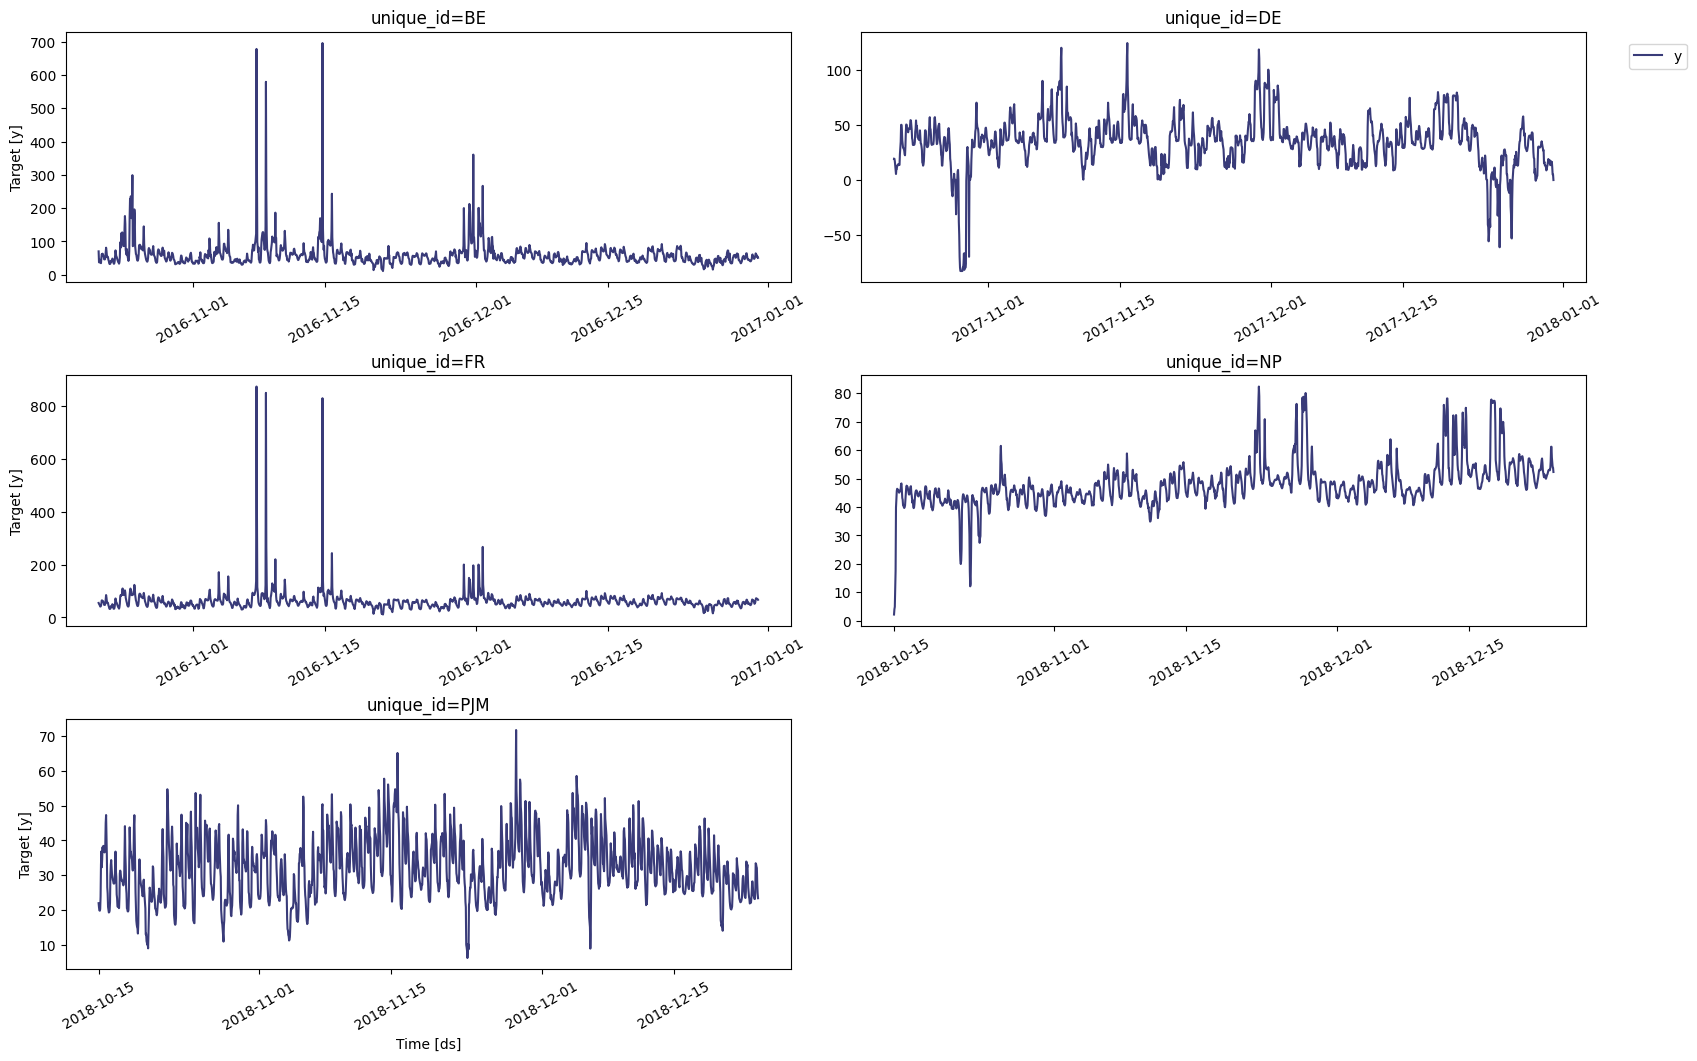

In [5]:
nixtla_client.plot(df)


In [9]:
timegpt_fcst_multiseries_df = nixtla_client.forecast(df=df, h=24, level=[80, 90])
timegpt_fcst_multiseries_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-12-31 00:00:00,45.190453,54.872482,57.369510,35.508423,33.011395
1,BE,2016-12-31 01:00:00,43.244446,51.114265,56.101627,35.374626,30.387266
2,BE,2016-12-31 02:00:00,41.958390,48.575985,54.632984,35.340794,29.283792
3,BE,2016-12-31 03:00:00,39.796486,47.266720,49.682045,32.326252,29.910927
4,BE,2016-12-31 04:00:00,39.204536,47.410120,47.677834,30.998955,30.731240


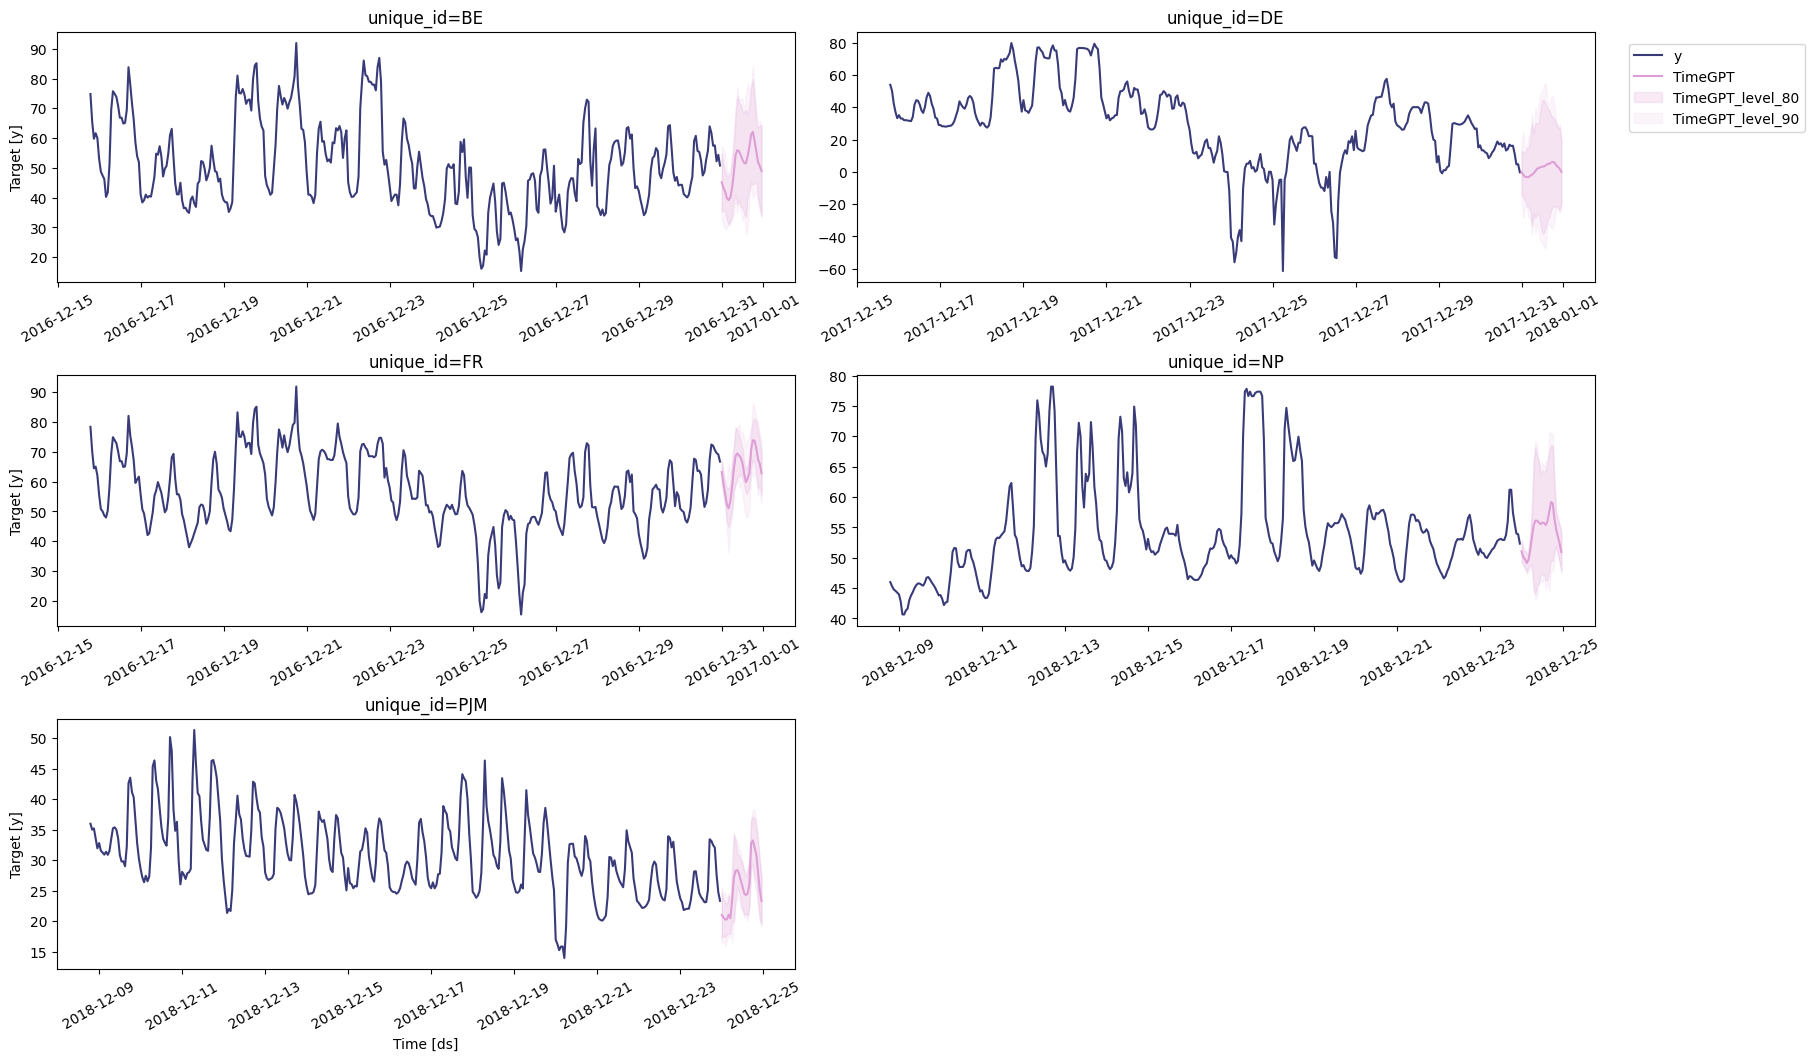

In [10]:
nixtla_client.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

In [11]:
timegpt_fcst_multiseries_with_history_df = nixtla_client.forecast(df=df, h=24, level=[80, 90], add_history=True)
timegpt_fcst_multiseries_with_history_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-10-27 00:00:00,56.076237,98.19689,110.13752,13.955579,2.014957
1,BE,2016-10-27 01:00:00,52.419730,94.54039,106.48101,10.299073,-1.641549
2,BE,2016-10-27 02:00:00,52.814724,94.93538,106.87601,10.694066,-1.246556
3,BE,2016-10-27 03:00:00,52.590267,94.71092,106.65155,10.469609,-1.471013
4,BE,2016-10-27 04:00:00,52.672980,94.79364,106.73426,10.552323,-1.388298


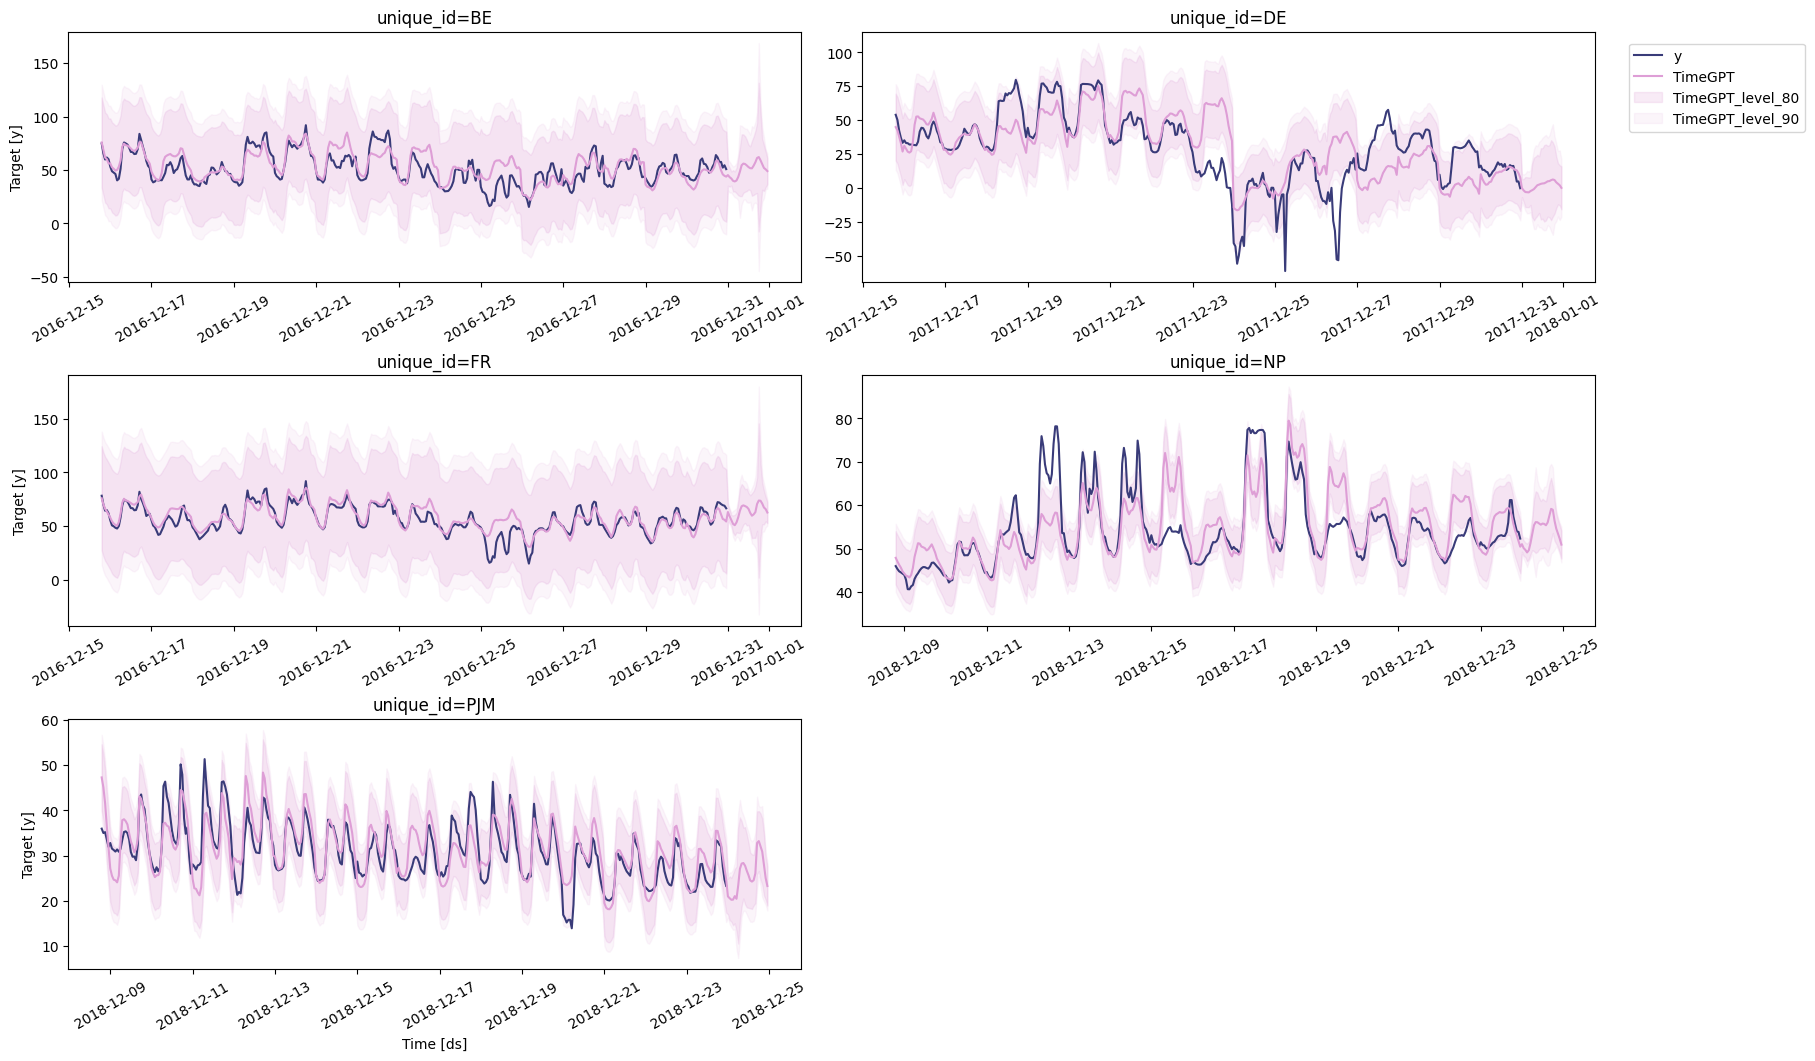

In [12]:
nixtla_client.plot(
    df,
    timegpt_fcst_multiseries_with_history_df.groupby('unique_id').tail(365 + 24),
    max_insample_length=365,
    level=[80, 90],
)